# Testing the necessity of complex numbers in Cirq Simulation

## Introduction

This study is about an experiment that proves that quantum theory has complex numbers in Hilbert space. This study contains a simulation of proven work on IBM [1] on Cirq, starting with the first theoretically proven [2] studies. The experiments focused on a study known as Clauser-Horne-Shimony-Holt (CHSH) inequality [3], which utilizes the sharing of Bell statuses.

##  Clauser-Horne-Shimony-Holt (CHSH) 

This experiment examines the Bell state between Alice and Bob and Charlie. The algorithm starts with the sharing of Bell states between Alice and Bob and Charlie, as shown in the figure below. Bob then performs a joing Bell state measurement (BSM) between his qubits. Then Alice and Charlie rotate the Z and Y axes before the measurement to measure complex numbers at different angles to change the complex state. At the end of the test, a critical value is calculated along with the results obtained from the measurement.

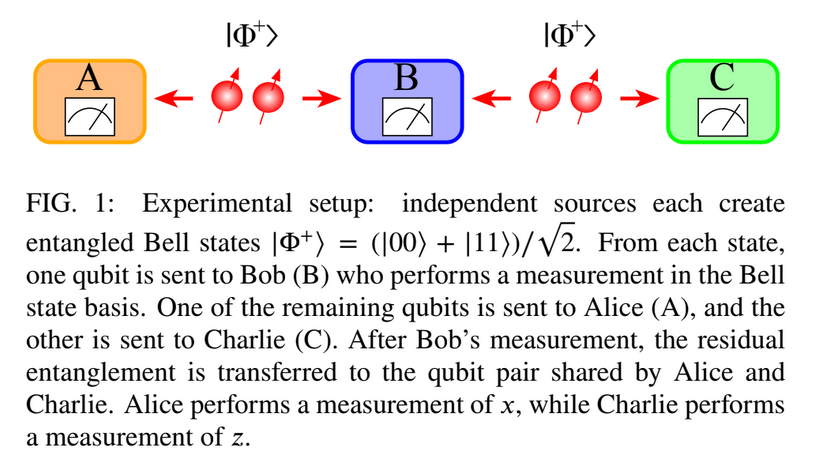[1]


This experiment is repeated with Alice and Charlie with different measurement angles. Alice chooses a x∈{X, Y, Z} Pauili transformations while Charlie chooses a z∈{(Z+X), (Z-X), (Z+Y), (Z-Y), (X+Y), (X-Y)}/√2  transforms to create different xz combinations for the rest of the test. If the sum of the critical values calculated in the tests with 12 possible combinations is below 7.66, it proves that there are no complex numbers in the quantum Hilbert space. But if the calculated critical value is between 8.49 and 7.66, the opposite will be proven. The figure below shows the environment and values in which the Clauser-Horne-Shimony-Holt experiment was tested.

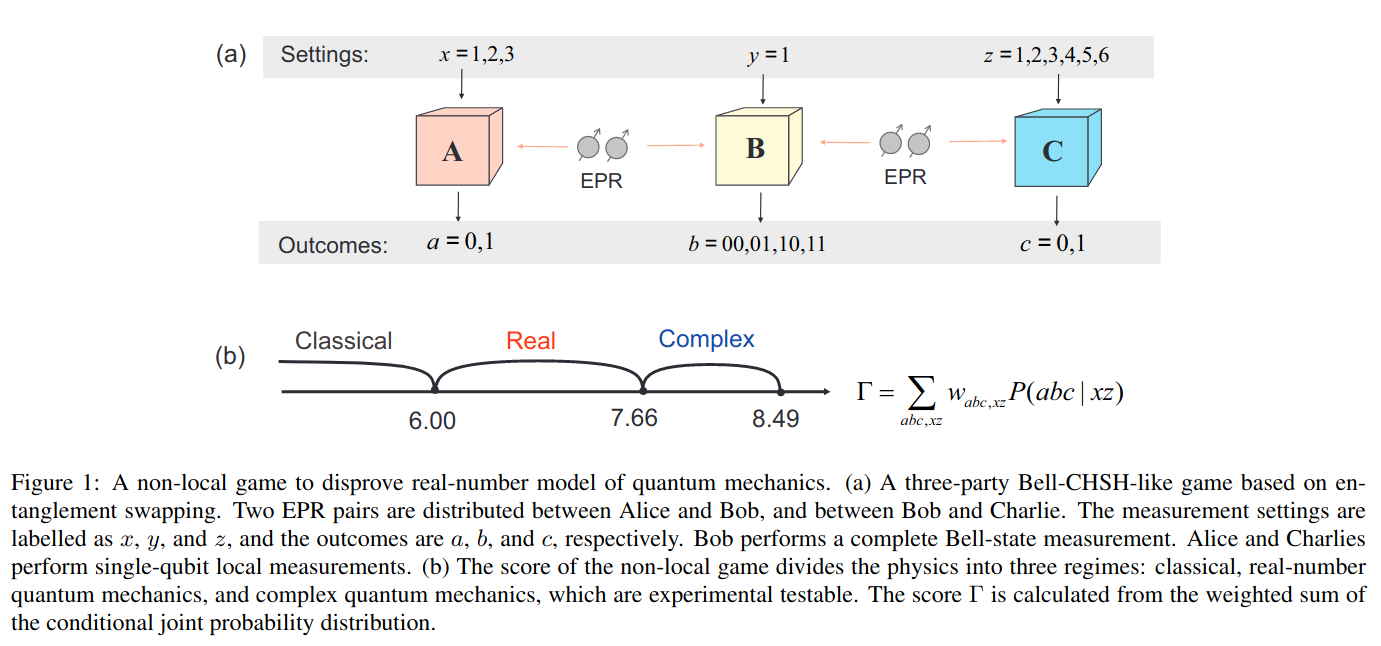 [2]

## Experiment Algorithm and Variables

This experiment was tested with 12 different xz∈{11, 12, 21, 22, 13, 14, 33, 34, 25, 26} for CHSH. The values of the rotations from selected xz combinations should be applied in the quantum circuit of the experiment as shown in the figure below.

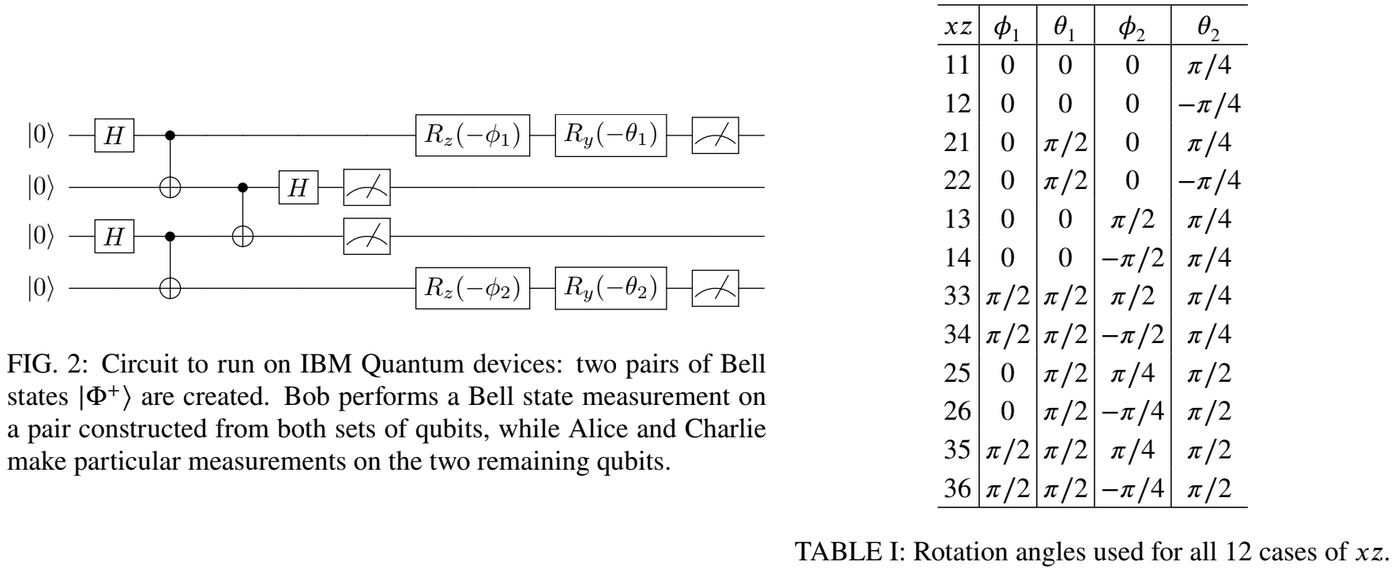 [1]

## Simulating the experiment with Cirq

In [19]:
from copy import copy
import matplotlib.pyplot as plt
import numpy
import cirq

In [20]:
# Angles are calculated for each xz combination.

XZ = ("11", "12", "21", "22", "13", "14", "33", "34", "25", "26", "35", "36")
XZ_angle = {
    "11": (0, 0, 0, numpy.pi / 4),
    "12": (0, 0, 0, -numpy.pi / 4),
    "21": (0, numpy.pi / 2, 0, numpy.pi / 4),
    "22": (0, numpy.pi / 2, 0, -numpy.pi / 4),
    "13": (0, 0, numpy.pi / 2, numpy.pi / 4),
    "14": (0, 0, -numpy.pi / 2, numpy.pi / 4),
    "33": (numpy.pi / 2, numpy.pi / 2, numpy.pi / 2, numpy.pi / 4),
    "34": (numpy.pi / 2, numpy.pi / 2, -numpy.pi / 2, numpy.pi / 4),
    "25": (0, numpy.pi / 2, numpy.pi / 4, numpy.pi / 2),
    "26": (0, numpy.pi / 2, -numpy.pi / 4, numpy.pi / 2),
    "35": (numpy.pi / 2, numpy.pi / 2, numpy.pi / 4, numpy.pi / 2),
    "36": (numpy.pi / 2, numpy.pi / 2, -numpy.pi / 4, numpy.pi / 2)
}

In [21]:
# With the method below, the experimental circuit is created and simulated.

def gen_circuit(angles, rep):
    """
    Args: 
        angles: tuple: Tuple of the angle from XZ_angle.
        rep: int: repitation value for simulation.
        
    Return:
        samples: Cirq result format of a simulation.
    """
    
    # Allocate 4 qubit circuit.
    qubits = cirq.LineQubit.range(4)
    c = cirq.Circuit()
    
    # Create Alice-Bob and Bob-Charlie Bell pairs.
    c.append(cirq.H(qubits[0]))
    c.append(cirq.H(qubits[2]))
    c.append(cirq.CNOT(qubits[0], qubits[1]))
    c.append(cirq.CNOT(qubits[2], qubits[3]))
    
    # Add joint Bell state measurement.
    c.append(cirq.CNOT(qubits[1], qubits[2]))    
    c.append(cirq.H(qubits[1]))
    
    # Add the specified angle rotations. 
    c.append(cirq.Rz(rads=-angles[0])(qubits[0]))
    c.append(cirq.Ry(rads=-angles[1])(qubits[0]))
    c.append(cirq.Rz(rads=-angles[2])(qubits[3]))
    c.append(cirq.Ry(rads=-angles[3])(qubits[3]))
    
    # Measure all.
    c.append(cirq.measure(*qubits, key="M"))
    
    # Simulate circit.
    sim = cirq.Simulator()
    samples = sim.run(c, repetitions=rep)
    return samples

In [22]:
# With the method below, the probability of a given state on given xz circuit can be found.

def solve_sxz(abc, xz_selected, data):
    """
    Args:
        abc: string: 4-lenght binary as string.
        xz_selected: string: Selected xz from XZ tuple.
        
    Return:
        value: double: Probailty range from 0 to 1. 
    """
    
    for i in range(data.__len__()):
        if XZ[i] == xz_selected:
            for j in range(data[i].__len__()):
                if f'{j:04b}' == abc:
                    return data[i][j]
    raise StopIteration(f'Solve for S_{abc}^{xz_selected} failed!')

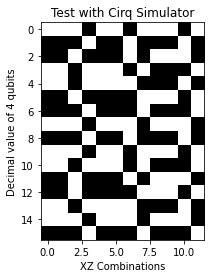

In [24]:
# The number of repetitions should defined.
rep = 10000

# The circuit is created and simulated for each xz combination.
sample_data = []
for xz in XZ:
    sample_data.append(gen_circuit(XZ_angle[xz], rep))

# The measurement results can be displayed for each XZ combination.
im_data = numpy.zeros((numpy.power(2, 4), sample_data.__len__()))
for i in range(sample_data.__len__()):
    data = cirq.get_state_histogram(sample_data[i])
    
    for j in range(data.__len__()):
        if data[j] > rep / numpy.power(2, 4):
            val = 1
        else:
            val = 0
        im_data[j][i] = val

plt.imshow(im_data, cmap='binary_r')
plt.title(f"Test with Cirq Simulator")
plt.xlabel("XZ Combinations")
plt.ylabel("Decimal value of 4 qubits")
plt.show()

In [26]:
# The number of repetitions should defined.
rep = 10000
sample_data = []

# The circuit is created and simulated for each xz combination.
for xz in XZ:
    sample_data.append(gen_circuit(XZ_angle[xz], rep))

# The measurement results are normalized between 0 and 1.
norm_data = []
for i in range(sample_data.__len__()):
    data = cirq.get_state_histogram(sample_data[i])
    data /= rep
    norm_data.append(copy(data))

# Critic value is calculated for each circuit.
total = 0.0
for i in range(numpy.power(2, 4)):
    values = []
    abc = f'{i:04b}'
    a, b1, b2, c = (int(x) for x in abc)                        # eg: 0000  --->  a(b1)(b2)c  
    ac_pow = numpy.power(-1, a+c)                               # (-1)^a+c
    b1_pow = numpy.power(-1, b1)                                # (-1)^b1
    b2_pow = numpy.power(-1, b2)                                # (-1)^b2
    bb_pow = numpy.power(-1, (b1 + b2) % 2)                     # (-1)^b1+b2

    for j in range(XZ.__len__()):
        values.append(solve_sxz(abc, XZ[j], norm_data))         # eg: Probabilty of 0000 in 11 circuit
    
    # Used formula is:
    # ((-1)^a+c) * [(-1)^b2*(S11+S12) + (-1)^b1*(S21-S22) + (-1)^b2*(S13+S14) - ((-1)^b1+b2)*(S33-S34) + (-1)^b1*(S25+S26) - ((-1)^b1+b2)*(S35-S36)]
    
    total += ac_pow*b2_pow*(values[0]+values[1])
    total += ac_pow*b1_pow*(values[2]-values[3])
    total += ac_pow*b2_pow*(values[4]+values[5])
    total -= ac_pow*bb_pow*(values[6]-values[7])
    total += ac_pow*b1_pow*(values[8]+values[9])
    total -= ac_pow*bb_pow*(values[10]-values[11])

print(f'Critic Value: {total}')

Critic Value: 8.468000000000005


## Referances

[1] Lancaster, Jarrett L. "Probing fundamental aspects of quantum mechanics with quantum computers." arXiv preprint arXiv:2205.01262 (2022).

[2] Chen, Ming-Cheng, et al. "Ruling out real-number description of quantum mechanics." arXiv preprint arXiv:2103.08123 (2021).

[3] J. F. Clauser, M. A. Horne, A. Shimony, and R. A. Holt, Phys. Rev. Lett. 23, 880 (1969), URL https://link.aps.org/doi/10.1103/PhysRevLett.23.880